# Student Grade Prediction
Bu projede alınan <b>kurs sayısı</b> ve <b>çalışma süresi</b> kullanılarak öğrencinin <b>notu</b> tahmin edilmeye çalışılacaktır.

Projede kullanılan veriler [buradan](https://thecleverprogrammer.com/2022/04/26/student-marks-prediction-with-machine-learning) temin edilmiştir.

![](https://college.us.com/wp-content/uploads/2023/01/Why-Grades-Should-Not-Be-Abolished.png.webp)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Student_Marks.txt")

## Keşfedici Veri Analizi (EDA)

In [3]:
df.sample(5)

,number_courses,time_study,Marks
28,5,0.156,9.333
62,6,3.606,19.590
46,4,3.797,16.703
88,5,1.803,11.253
53,7,6.049,36.653


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Alanlar arasındaki korelasyona bakalım

<Axes: >

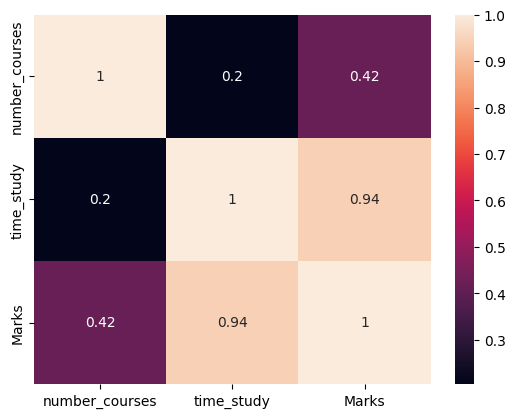

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [7]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


## Modelleme

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
                
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
                 
        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [9]:
x=df.drop("Marks", axis=1)
y=df[["Marks"]]

In [10]:
x.shape, y.shape

((100, 2), (100, 1))

In [11]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.995454,1.093271,0.960234
KNeighborsRegressor,0.990178,1.607091,1.232860
Decision Tree,0.990083,1.614839,1.314750
Extra Tree,0.983424,2.087722,1.739300
XGBRegressor,0.978876,2.356796,1.536967
Linear,0.945994,3.768385,3.079345
Ridge,0.945413,3.788572,3.097206
Lasso,0.934436,4.152085,3.391364
ElasticNet,0.911549,4.822627,4.011604


### Feature Importance

In [12]:
lr=LinearRegression()

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [14]:
model=lr.fit(x_train, y_train)

In [15]:
tahmin = model.predict(x_test)

In [16]:
r2_score(y_test, tahmin)

0.9459936100591213

In [17]:
mean_squared_error(y_test, tahmin) ** .5

3.768385083344663

In [18]:
feature_importance=pd.DataFrame({"Feature":x_train.columns, "Coefs": lr.coef_[0]})
feature_importance=feature_importance.sort_values(by="Coefs", ascending=False)
feature_importance

,Feature,Coefs
1,time_study,5.169872
0,number_courses,1.871550


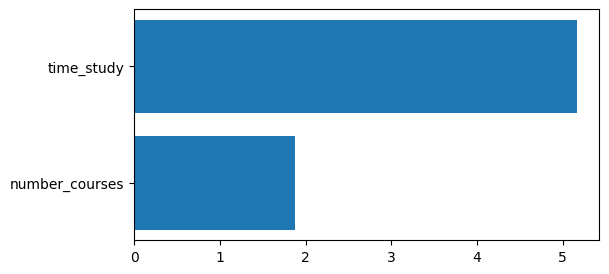

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.barh(feature_importance["Feature"], feature_importance["Coefs"]);
plt.gca().invert_yaxis()

In [20]:
residuals=y_test-tahmin
residuals

,Marks
83,-3.166783
53,-1.107357
70,-3.581794
45,-0.732709
44,-1.233082
39,6.329994
22,-1.139110
80,6.696528
10,5.020330
0,-3.105385


<Axes: ylabel='Count'>

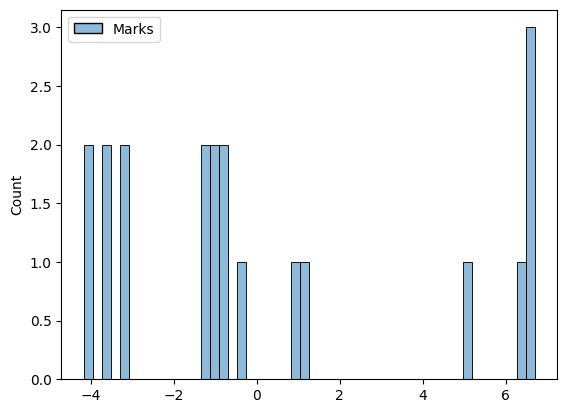

In [21]:
sns.histplot(residuals, bins=50)

<Axes: xlabel='Marks', ylabel='Density'>

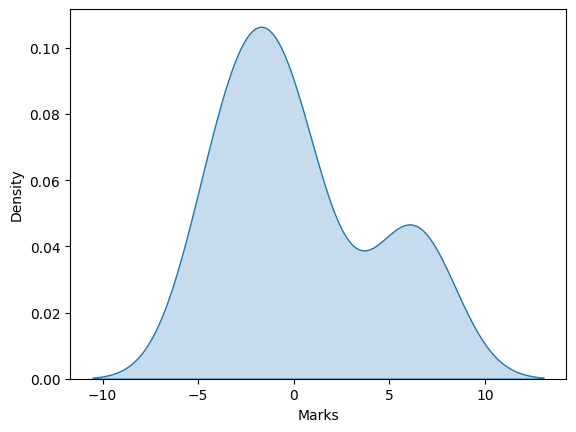

In [22]:
sns.kdeplot(x=residuals["Marks"], fill=True)

# Sonuç
Bu projede alınan kurs sayısı ve çalışma süresi kullanılarak bir öğrencinin notu tahmin edilmeye çalışıldı. Geliştirilen Regression modellerinde en yüksek başarı oranı Gradient Boosting	(%99.5) modeli ile elde edilmiştir.
<br> Bu modeli yeniden eğiterek kaydedip Streamlit uygulaması için kullanalım.

In [23]:
gb=GradientBoostingRegressor()

In [24]:
model=gb.fit(x,y)

In [25]:
import pickle
pickle.dump(model, open('student_marks.pkl', 'wb'))

In [26]:
x.columns

Index(['number_courses', 'time_study'], dtype='object')

In [28]:
o=[[5,3.2]]
model.predict(o)

array([15.80684454])

Model kullanılarak Streamlit uygulaması geliştirilmiş ancak Hugging Face üzerinde yayımlamaya değer görülmemiştir.